<a href="https://colab.research.google.com/github/bharaniakella/Akellian_DL/blob/main/Multilayer_seq_2_class_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [20]:
import torch.nn.functional as F

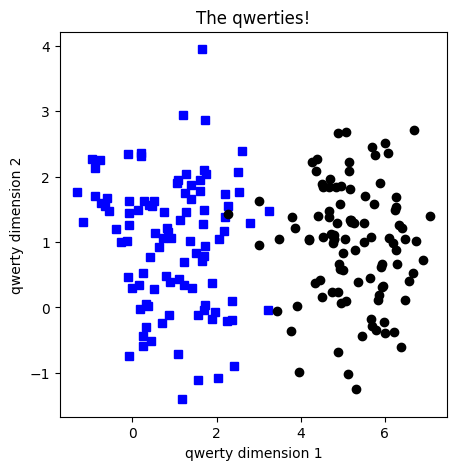

In [21]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [22]:
class AnnMultilayer(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers=nn.ModuleDict()
    self.layers['input']=nn.Linear(2,16)
    self.layers['hidden']=nn.Linear(16,16)
    self.layers['output']=nn.Linear(16,1)

  def forward(self,x):
    x=F.relu(self.layers['input'](x))
    x=F.relu(self.layers['hidden'](x))
    x=self.layers['output'](x)
    return x



In [23]:
net=AnnMultilayer()
temp_data=torch.randn(10,2)
yhat=net(temp_data)
yhat

tensor([[ 0.0143],
        [-0.0188],
        [-0.0423],
        [-0.0121],
        [-0.0606],
        [-0.0178],
        [-0.0138],
        [-0.0245],
        [-0.0124],
        [-0.0454]], grad_fn=<AddmmBackward0>)

In [24]:
num_epochs=500
losses=torch.zeros(num_epochs)
def train_model(ann_classify):
  lr=0.05
  loss_fun=nn.BCEWithLogitsLoss()
  optimizer=torch.optim.SGD(ann_classify.parameters(),lr)

  for epochi in range(num_epochs):
    yhat=ann_classify(data)

    loss=loss_fun(yhat,labels)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=ann_classify(data)
  total_acc=100*torch.mean(((predictions>0)==labels).float())

  return predictions,losses,total_acc

In [25]:
predictions,losses,total_acc=train_model(net)

In [26]:
total_acc

tensor(98.)